# 4: Gradient Descent and Backpropagation

**Objective:** Learn to use **gradient descent** and **backpropagation** to adjust the weights and biases of the neural network. We will see how to calculate these adjustments and apply them so that the network minimizes its error during training.

## 4.1: Gradient Descent

Gradient descent is an optimization algorithm that adjusts the network’s parameters (weights and biases) in the opposite direction of the error function’s gradient. This helps to gradually reduce the error and approach a minimum of the loss function.

#### Parameter Adjustment Formula
For each network parameter, such as a weight $w$ or a bias $b$, gradient descent adjusts the value using the following formula:
$$
\text{new value} = \text{current value} - \text{learning rate} \times \text{gradient}
$$

where:

- **learning rate** is a value that controls the size of the adjustment step. High values speed up learning but may destabilize the model; low values allow for more controlled changes.

#### Example of Parameter Adjustment with Gradient Descent
Suppose we have an initial weight $w = 0.5$, a learning rate of 0.1, and a calculated gradient of 0.3. The new value of weight $w$ would be:
$$
\text{new } w = 0.5 - 0.1 \times 0.3 = 0.5 - 0.03 = 0.47
$$

This adjustment brings the weight closer to a value that may potentially reduce the network’s error.

## 4.2: Backpropagation

**Backpropagation** is a process to calculate the gradient of the error function with respect to each network parameter (weights and biases). This algorithm uses the **chain rule** to propagate the error from the output layer back to the previous layers, enabling adjustment of all parameters.

#### Backpropagation Process

1. **Calculate the error at the output layer:** Based on the difference between the network’s prediction and the actual label.

2. **Propagate the error backward:** Calculate the gradients for each layer of the network, starting from the output layer and moving back through the previous layers.

3. **Adjust the weights and biases:** Use the calculated gradients along with gradient descent to update the network’s parameters.

#### Example of Gradient Calculation in Backpropagation
Suppose we have a network with one hidden layer and an output layer. After calculating the error at the output layer, we backpropagate to adjust the weights of the hidden layer.

1. **Output (Error at the Output Layer):**
   - Network prediction: $[0.8, 0.1, 0.1]$
   - Actual label: $[1, 0, 0]$
   - Output error: $[0.8 - 1, 0.1 - 0, 0.1 - 0] = [-0.2, 0.1, 0.1]$

2. **Gradient Calculation in the Hidden Layer:**
   - If the gradient with respect to the output is $[-0.2, 0.1, 0.1]$, we use the derivative of the activation function to calculate the gradient in the hidden layer.

## 4.3: Coding backpropagation on a single neuron

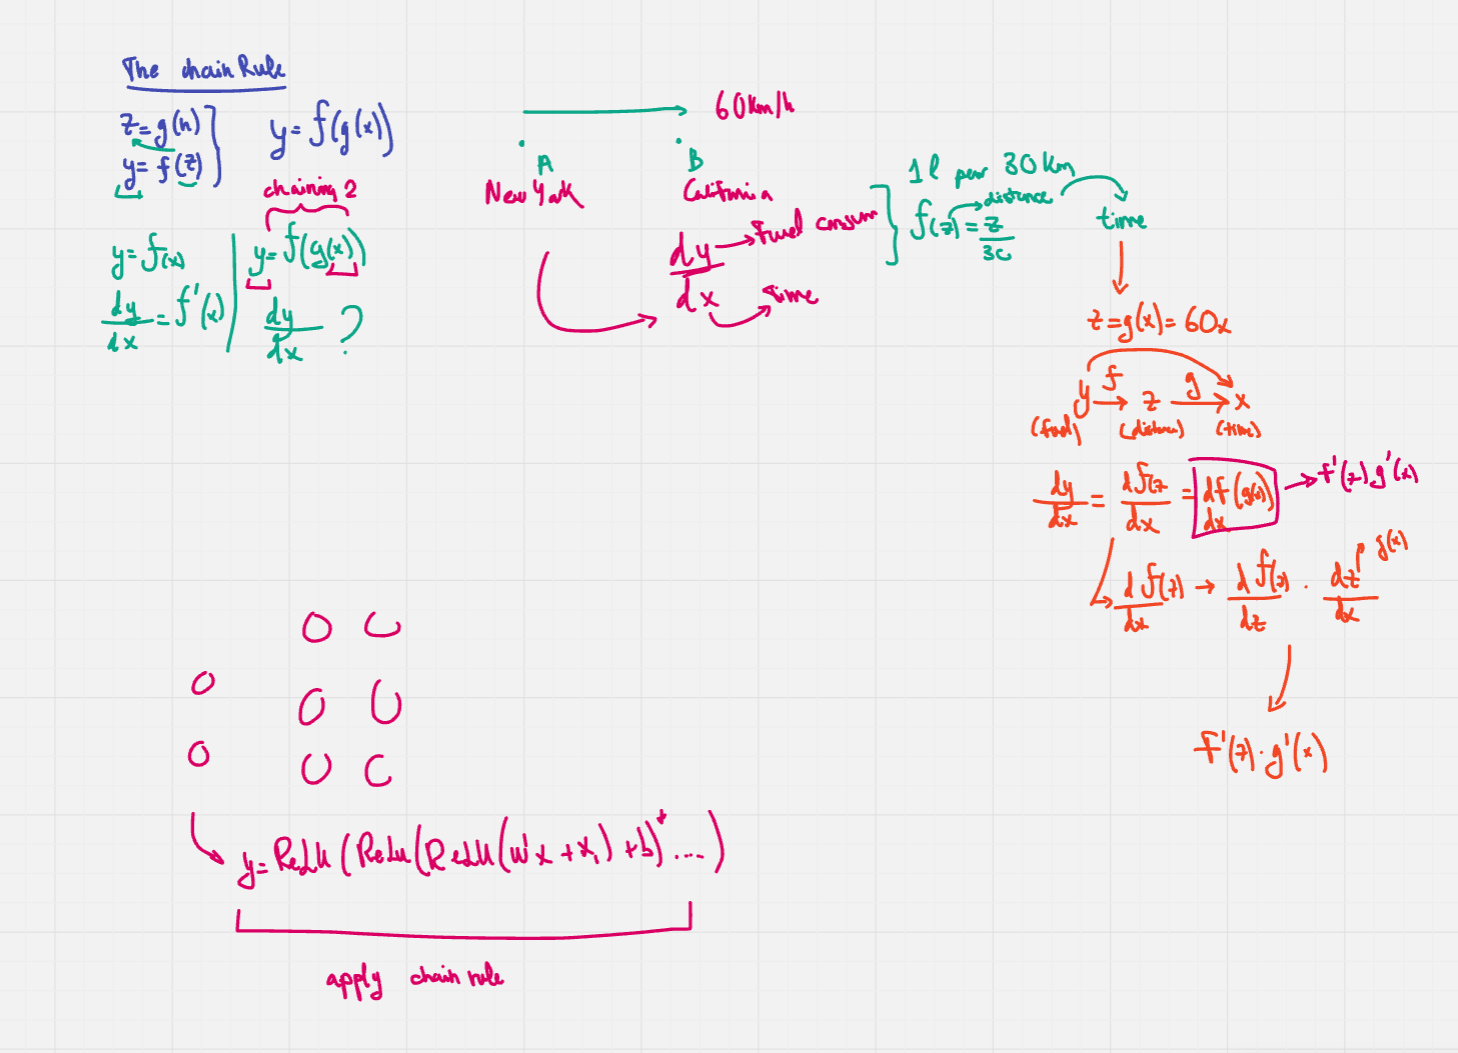

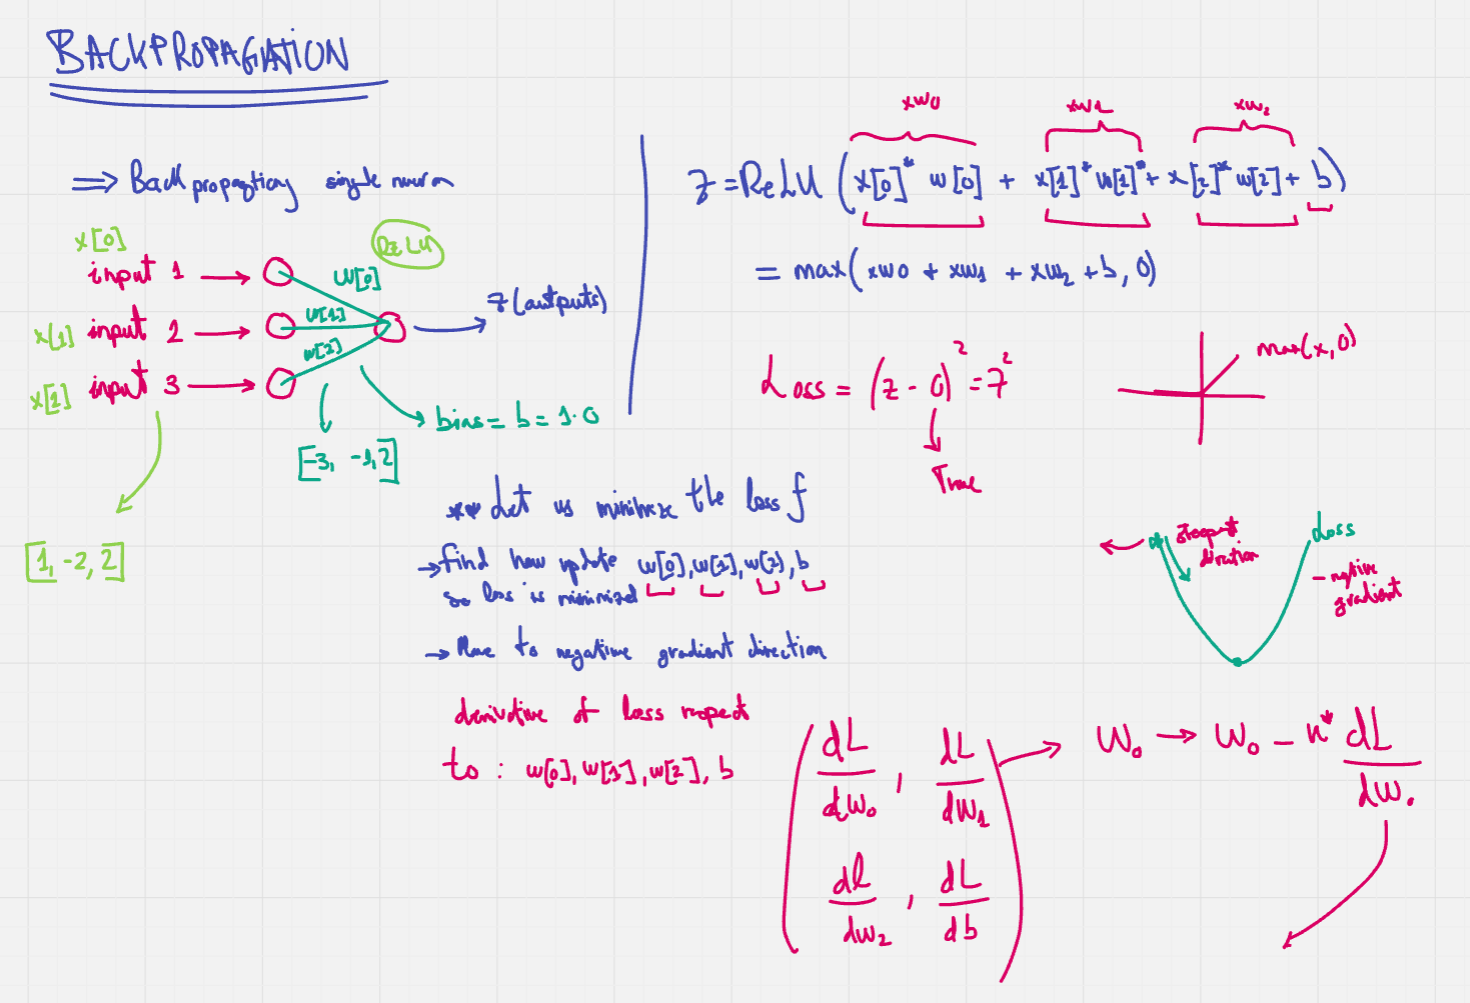

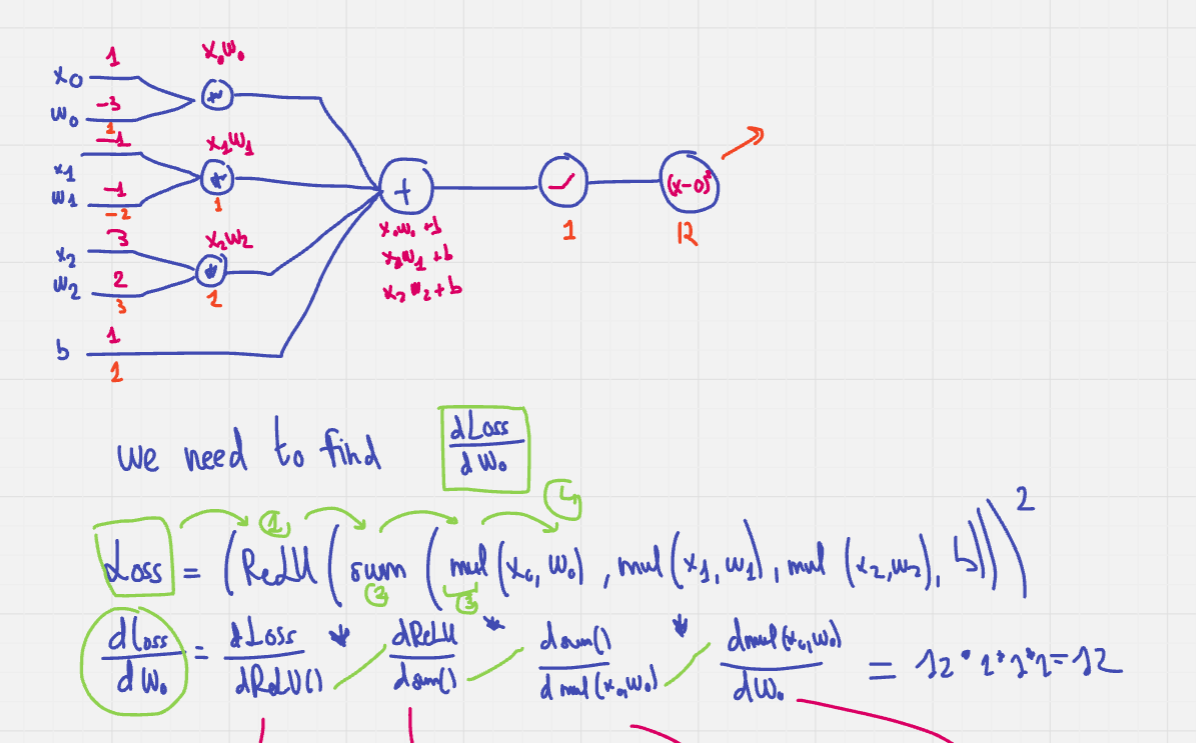

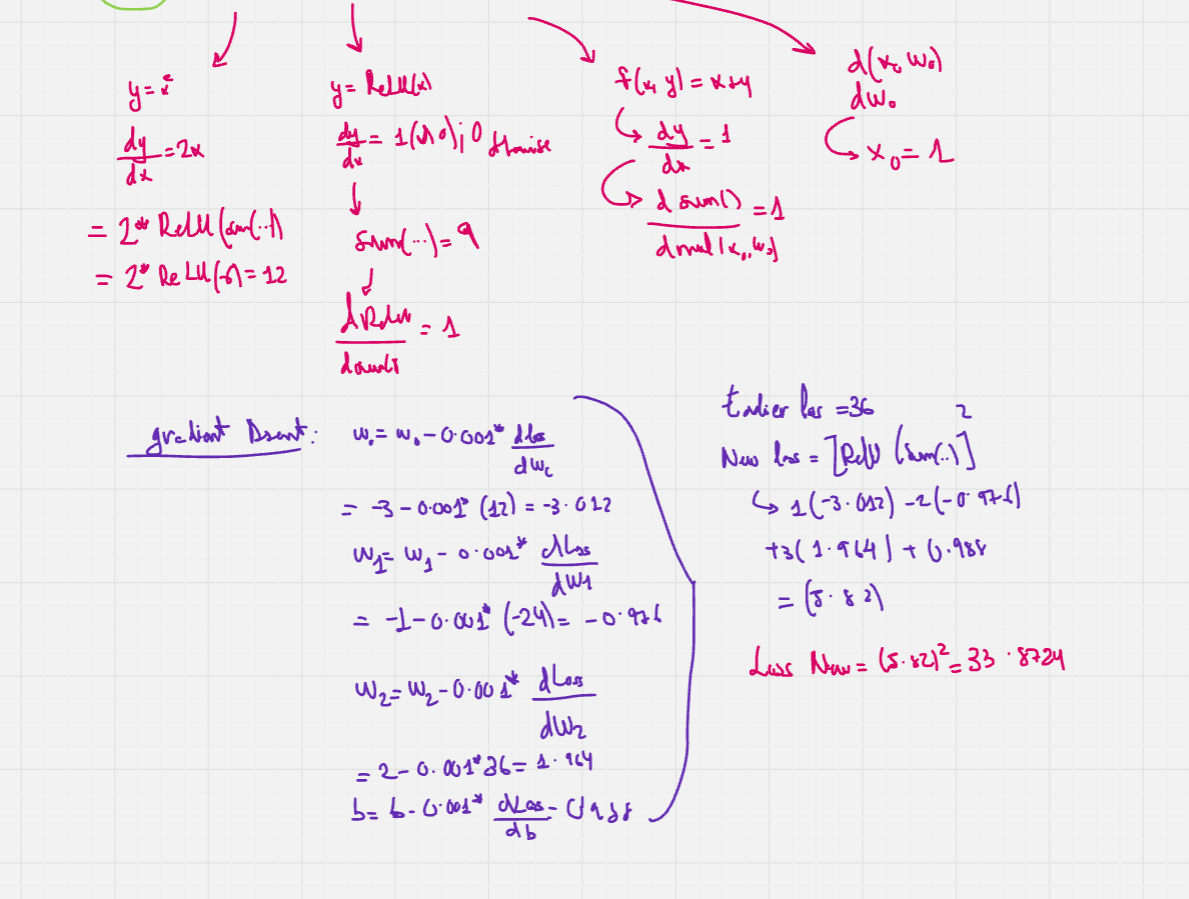

In [1]:
import numpy as np

weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

for iteration in range(200):
    # Forward pass
    linear_output = np.dot(weights, inputs) + bias
    output = relu(linear_output)
    loss = (output - target_output) ** 2

    # Backward pass
    dloss_doutput = 2 * (output - target_output)
    doutput_dlinear = relu_derivative(linear_output)
    dlinear_dweights = inputs
    dlinear_dbias = 1.0

    dloss_dlinear = dloss_doutput * doutput_dlinear
    dloss_dweights = dloss_dlinear * dlinear_dweights
    dloss_dbias = dloss_dlinear * dlinear_dbias

    # Update weights and bias
    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias

    print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)

Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872399999999985
Iteration 3, Loss: 31.870541159999995
Iteration 4, Loss: 29.98699217744401
Iteration 5, Loss: 28.21476093975706
Iteration 6, Loss: 26.54726856821742
Iteration 7, Loss: 24.978324995835766
Iteration 8, Loss: 23.502105988581878
Iteration 9, Loss: 22.113131524656684
Iteration 10, Loss: 20.80624545154949
Iteration 11, Loss: 19.576596345362915
Iteration 12, Loss: 18.419619501351963
Iteration 13, Loss: 17.331019988822064
Iteration 14, Loss: 16.306756707482677
Iteration 15, Loss: 15.343027386070442
Iteration 16, Loss: 14.43625446755368
Iteration 17, Loss: 13.583071828521268
Iteration 18, Loss: 12.780312283455652
Iteration 19, Loss: 12.024995827503426
Iteration 20, Loss: 11.314318574097976
Iteration 21, Loss: 10.645642346368787
Iteration 22, Loss: 10.016484883698395
Iteration 23, Loss: 9.424510627071816
Iteration 24, Loss: 8.867522049011871
Iteration 25, Loss: 8.34345149591527
Iteration 26, Loss: 7.850353512506679
Iteration 27, Loss:

## Step 4.4: Full Implementation of backpropagation and gradient descent in a Neural Network

Let’s look at a complete example in Python where we adjust weights and biases in a network using gradient descent and backpropagation.

### Examples and Exercises

1. **Adjusting the Learning Rate:**
   - Change the `learning_rate` value in the network to values like 0.1 or 0.001 and observe the effect on adjusting weights and biases. A high `learning rate` value can lead to larger, faster adjustments, while a low value allows for smaller, more controlled changes.

2. **Interpreting the Adjustment:**
   - After running the code, observe changes in weights and biases. How do these adjustments affect the network's predictions?

3. **Additional Tests:**
   - Change the values of `input_data` or `y_real` and observe how these affect the adjustment of weights and biases. Try to predict how the weights will adjust before running the code.

In [2]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_values = np.exp(x - np.max(x))
    return exp_values / np.sum(exp_values)

class NeuralNetworkWithBackprop:
    def __init__(self, learning_rate=0.01):
        self.weights_hidden = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
        self.bias_hidden = np.array([0.1, -0.1, 0.05])
        self.weights_output = np.array([[0.7, 0.8, 0.9], [-0.1, -0.2, -0.3], [0.3, 0.2, 0.1]])
        self.bias_output = np.array([0.1, -0.1, 0.05])
        self.learning_rate = learning_rate

    def forward(self, input_data):
        # Hidden layer
        self.hidden_layer_input = np.dot(self.weights_hidden, input_data) + self.bias_hidden
        self.hidden_layer_output = relu(self.hidden_layer_input)
        
        # Output layer with Softmax
        self.output_layer_input = np.dot(self.weights_output, self.hidden_layer_output) + self.bias_output
        output = softmax(self.output_layer_input)
        
        return output

    def backward(self, input_data, y_pred, y_real):
        # Error in the output layer
        output_error = y_pred - y_real  # Cross-entropy gradient with Softmax
        
        # Gradients of weights and biases in the output layer
        grad_weights_output = np.outer(output_error, self.hidden_layer_output)
        grad_bias_output = output_error
        
        # Error in the hidden layer
        hidden_error = np.dot(self.weights_output.T, output_error) * relu_derivative(self.hidden_layer_input)
        grad_weights_hidden = np.outer(hidden_error, input_data)
        grad_bias_hidden = hidden_error
        
        # Adjust weights and biases using gradient descent
        self.weights_output -= self.learning_rate * grad_weights_output
        self.bias_output -= self.learning_rate * grad_bias_output
        self.weights_hidden -= self.learning_rate * grad_weights_hidden
        self.bias_hidden -= self.learning_rate * grad_bias_hidden

network = NeuralNetworkWithBackprop(learning_rate=0.01)

input_data = np.array([2.0, 3.0])
y_real = np.array([1, 0, 0]) 

# Forward pass and obtaining predictions
y_pred = network.forward(input_data)

# Backpropagation and parameter adjustment
network.backward(input_data, y_pred, y_real)

print("Adjusted hidden layer weights:\n", network.weights_hidden)
print("Adjusted hidden layer biases:\n", network.bias_hidden)
print("Adjusted output layer weights:\n", network.weights_output)
print("Adjusted output layer biases:\n", network.bias_output)

Adjusted hidden layer weights:
 [[0.10022781 0.20034171]
 [0.30033243 0.40049865]
 [0.50043706 0.60065559]]
Adjusted hidden layer biases:
 [ 0.1001139  -0.09983378  0.05021853]
Adjusted output layer weights:
 [[ 0.70023541  0.80044466  0.90074546]
 [-0.10002087 -0.20003943 -0.3000661 ]
 [ 0.29978546  0.19959477  0.09932064]]
Adjusted output layer biases:
 [ 0.10026157 -0.10002319  0.04976163]
